<div>
Olá, Reinner!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>

# Instrução do Projeto

A Film Junky Union, uma nova comunidade para entusiastas de filmes clássicos, está desenvolvendo um sistema para filtrar e categorizar resenhas de filmes. O objetivo é treinar um modelo para detectar automaticamente resenhas negativas. Você usará um conjunto de dados de resenhas de filmes do IMDB com rotulagem de polaridade para criar um modelo para classificar resenhas como positivas e negativas. Ele precisará ter um valor F1 de pelo menos 0,85.

## Inicialização

In [15]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# a próxima linha fornece gráficos de melhor qualidade em telas HiDPI
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [17]:
# isso é para usar progress_apply, leia mais em https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Carregar Dados

In [18]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [19]:
print(df_reviews.head())

      tconst title_type primary_title original_title  start_year end_year  \
0  tt0068152      movie             $              $        1971       \N   
1  tt0068152      movie             $              $        1971       \N   
2  tt0313150      short          '15'           '15'        2002       \N   
3  tt0313150      short          '15'           '15'        2002       \N   
4  tt0313150      short          '15'           '15'        2002       \N   

  runtime_minutes  is_adult              genres  average_rating  votes  \
0             121         0  Comedy,Crime,Drama             6.3   2218   
1             121         0  Comedy,Crime,Drama             6.3   2218   
2              25         0  Comedy,Drama,Short             6.3    184   
3              25         0  Comedy,Drama,Short             6.3    184   
4              25         0  Comedy,Drama,Short             6.3    184   

                                              review  rating   sp  pos  \
0  The pakage impl

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente.
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>



## AED

Vamos verificar o número de filmes e resenhas ao longo dos anos.

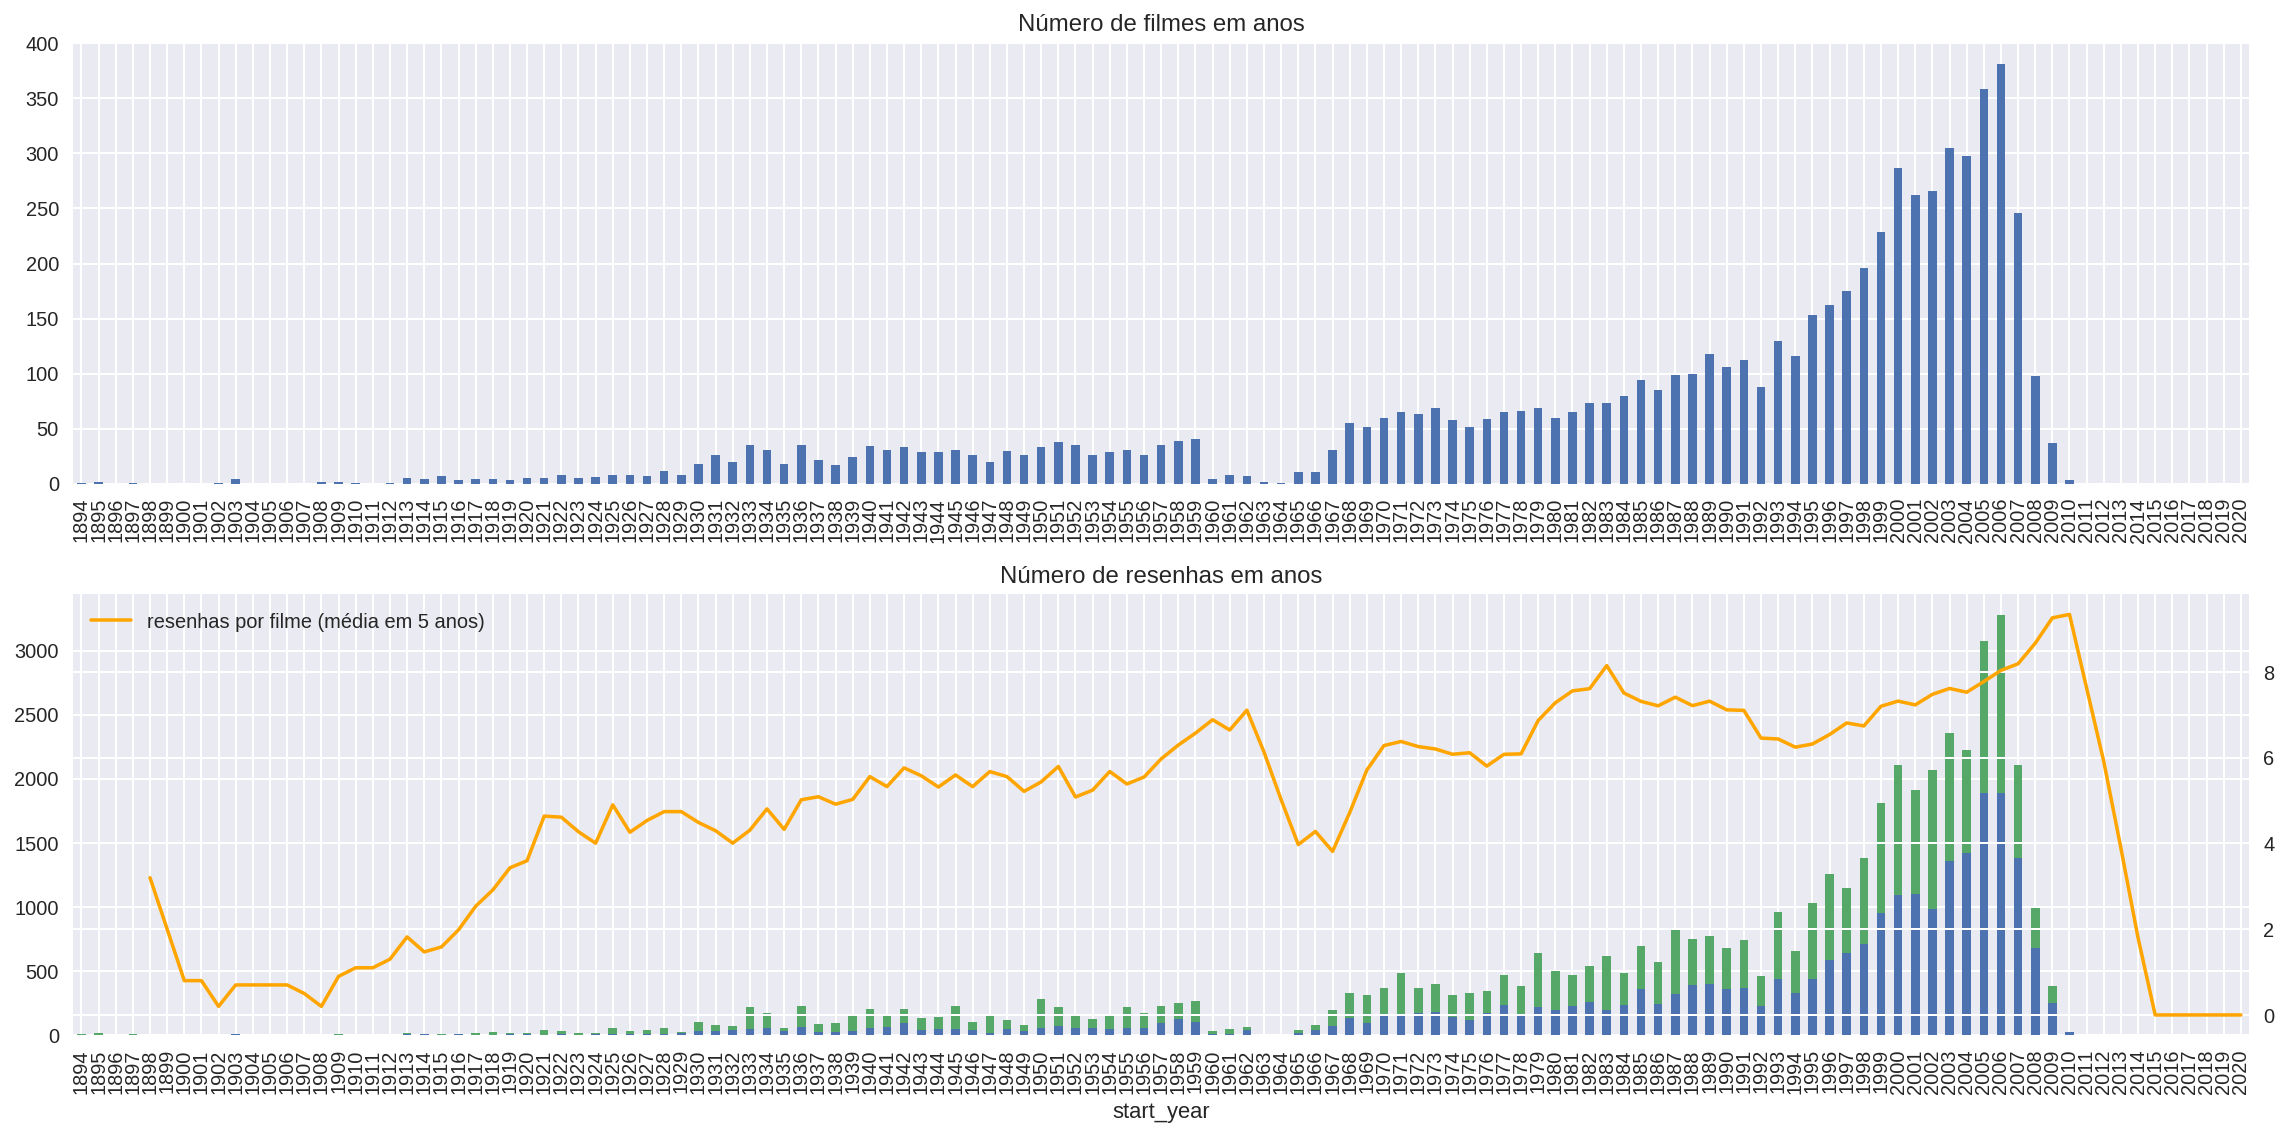

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de filmes em anos')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='resenhas por filme (média em 5 anos)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de resenhas em anos')

fig.tight_layout()

Vamos verificar a distribuição do número de resenhas por filme com a contagem exata e o EDK (Estimativa de densidade kernel - só para saber como pode diferir da contagem exata)

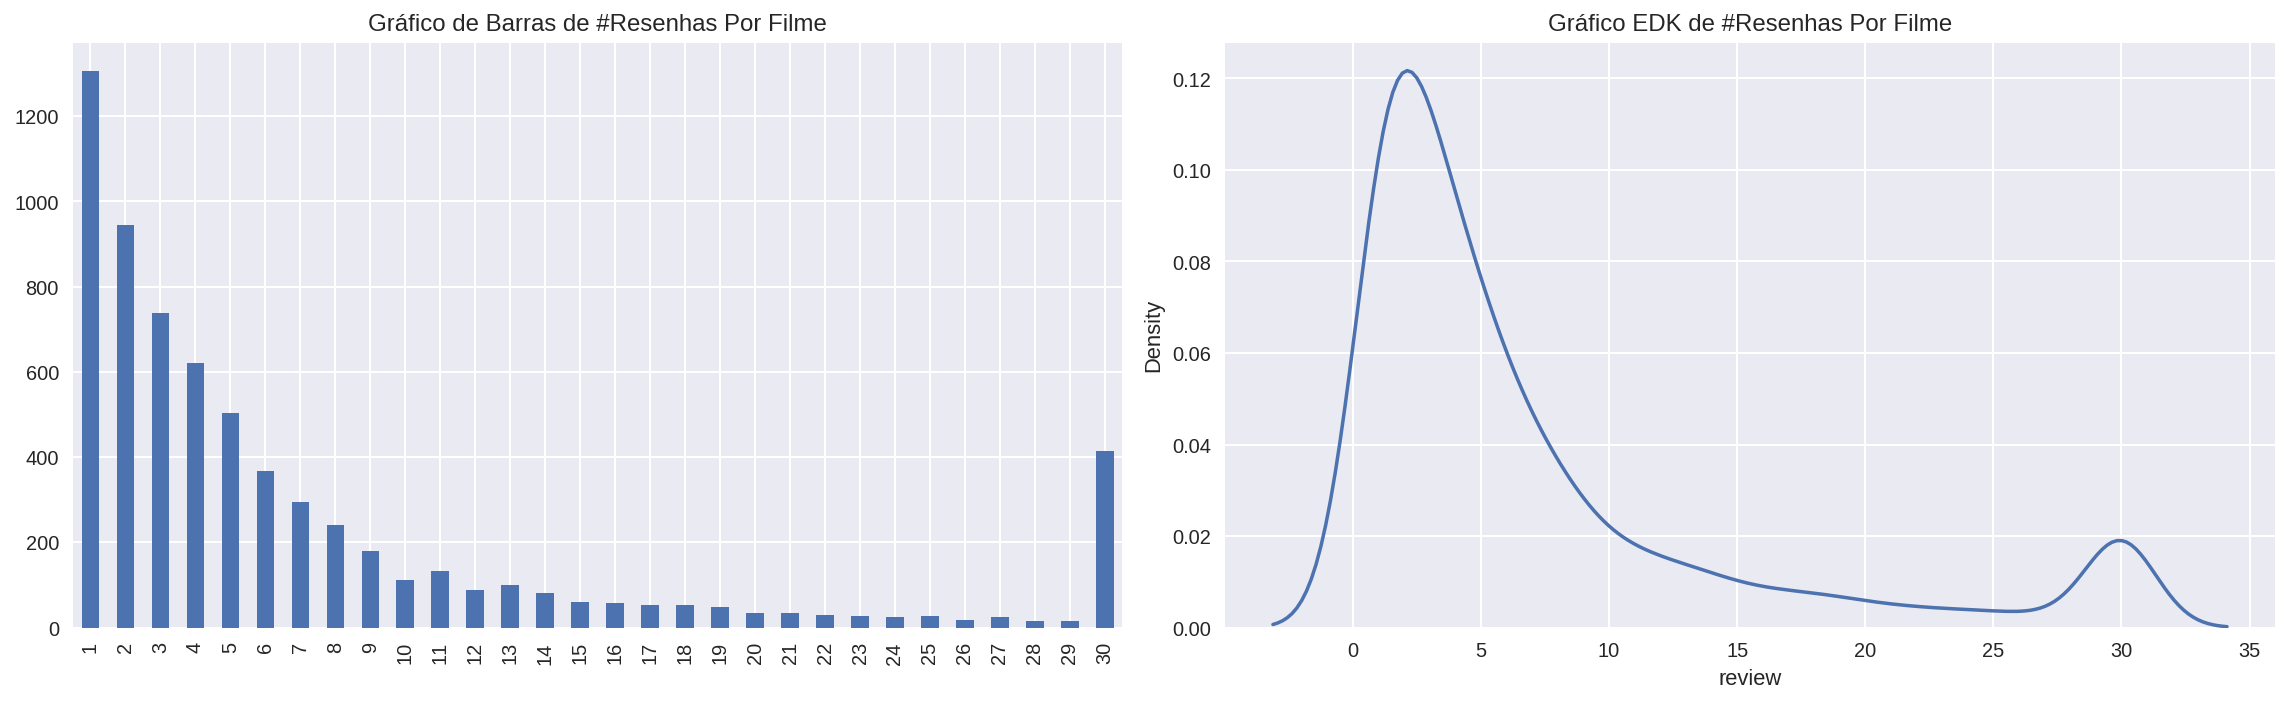

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de Barras de #Resenhas Por Filme')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico EDK de #Resenhas Por Filme')

fig.tight_layout()

- The number of movies increased after 1967
- The number of reviews per movie are equal to 1
- The majority of the movies have 1-10 reviews

In [22]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

The classes are equally distributed

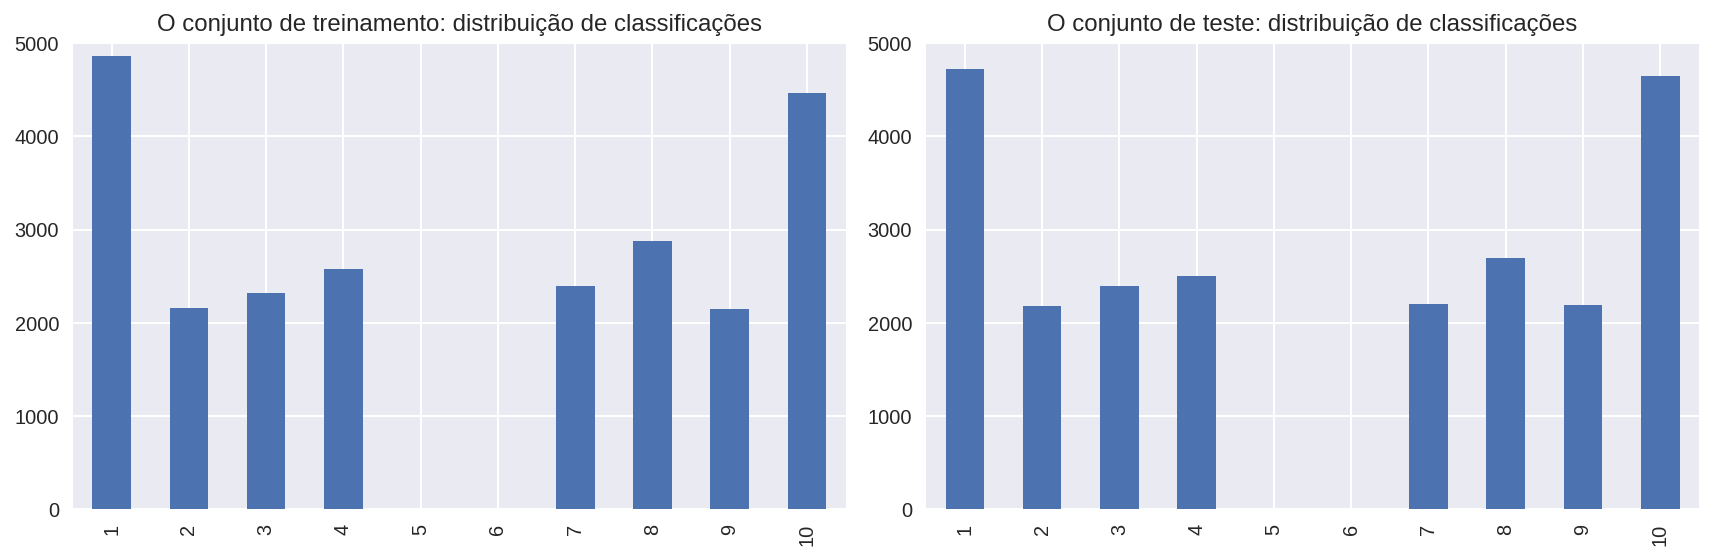

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('O conjunto de treinamento: distribuição de classificações')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('O conjunto de teste: distribuição de classificações')

fig.tight_layout()

Train and test have the same distribution. It´s expected to build Machine Learning models

In [24]:
#build functions to plot
def groupby_plot_1(data, filter, groupby_columns, title):
    dft = data.query(filter).groupby(groupby_columns)['pos'].count().unstack()
    dft.index = dft.index.astype('int')
    dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
    dft.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title)

def groupby_plot_2(data, filter, groupby_columns, title):
    dft = data.query(filter).groupby(groupby_columns)['pos'].count().unstack()
    sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
    sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
    ax.legend()
    ax.set_title(title)

Distribuição de resenhas negativas e positivas ao longo dos anos para duas partes do conjunto de dados

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


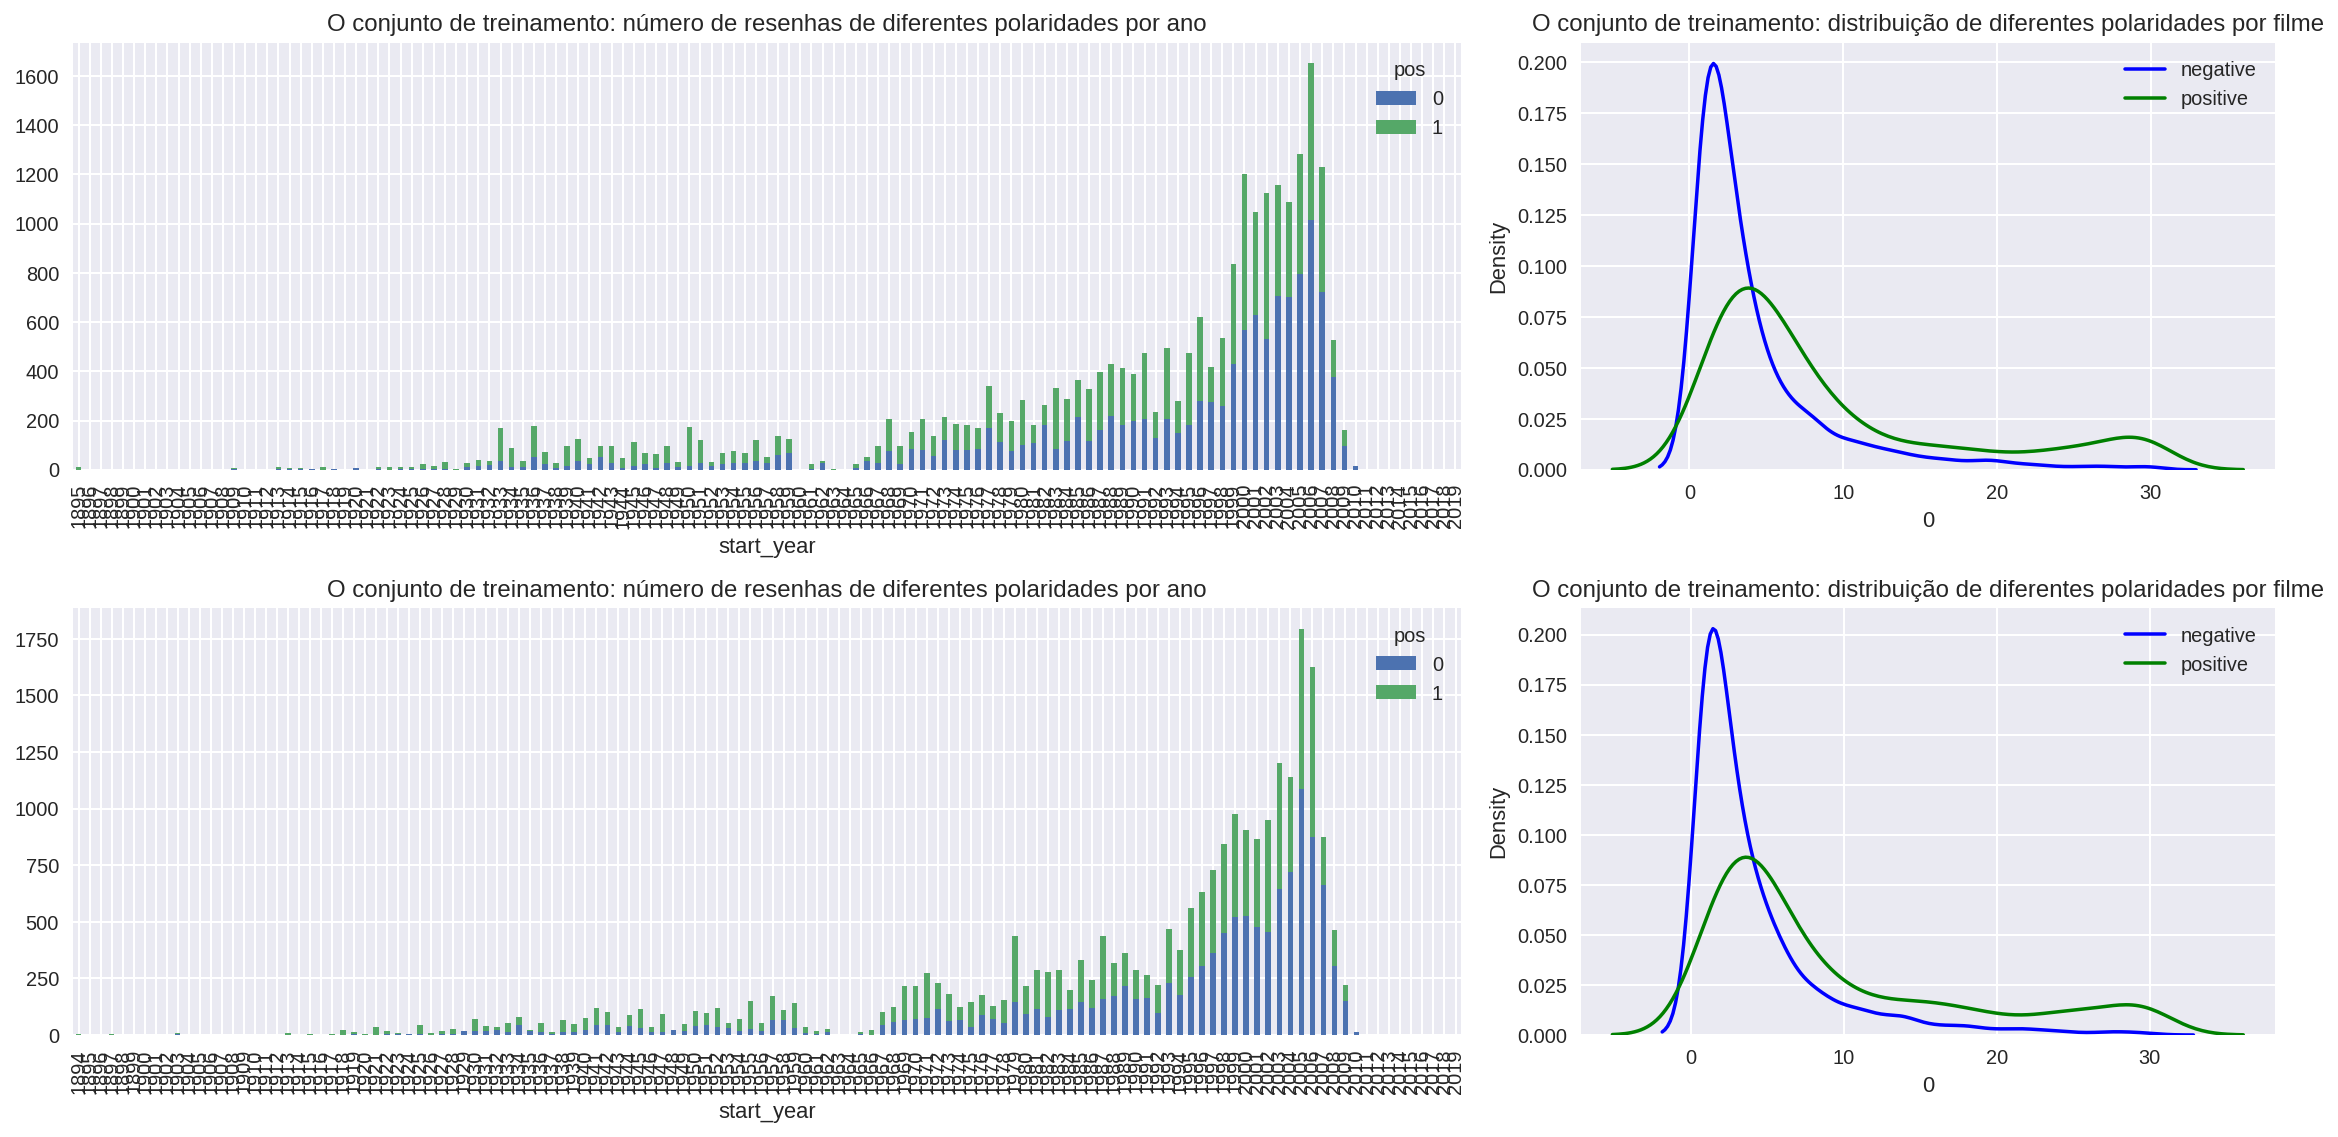

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

data=df_reviews
filter= 'ds_part == "train"'
groupby_columns = ['start_year', 'pos']
title = 'O conjunto de treinamento: número de resenhas de diferentes polaridades por ano'

groupby_plot_1(data, filter, groupby_columns, title)

ax = axs[0][1]

groupby_columns_2 = ['tconst', 'pos']
title_2 = 'O conjunto de treinamento: distribuição de diferentes polaridades por filme'

groupby_plot_2(data, filter, groupby_columns_2, title_2)


ax = axs[1][0]

filter_2 = 'ds_part == "test"'
title_3 = 'O conjunto de teste: número de resenhas de diferentes polaridades por ano'

groupby_plot_1(data, filter_2, groupby_columns, title)


ax = axs[1][1]

title_4 = 'The test set: distribution of different polarities per movie'

groupby_plot_2(data, filter_2, groupby_columns_2, title_2)

fig.tight_layout()

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Sugestão: crie funções para organizar e reutilizar o seu código.
</div>



- We have more negative than positive reviews
- Not train or test has normal distribution
- Both of them are deslocated to the right, it means that the majority of data are at left side

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Essa conclusão poderia ser mais detalhada, embasada na distribuição dos dados plotada acima.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante analisou os dados dos conjuntos de treino e teste. É sempre importante fazer essa validação, pois a modelagem de Machine Learning assume que dados de teste (não usados no processo de treinamento) seguem a mesma distribuição dos dados usados para treinamento. Se essa premissa é violada, o modelo perde poder de generalização ao ser usado em dados reais.
</div>

## Procedimento de Avaliação

Compondo uma rotina de avaliação que pode ser utilizada para todos os modelos deste projeto

In [57]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        eval_stats[type]['F1'] = f1_scores
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # Curva de precisão-revocação
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # definindo cruzamentos para alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # Curva de precisão-revocação
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # definindo cruzamentos para alguns limiares
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
Aqui nessa função temos um pequeno problema de sintaxe que está gerando erro ao calcular as métricas. Repare que o nome da variável para a métrica de acurácia que você usa no dicionário de métricas é "Accuracy" e no dataframe, logo mais abaixo, você usa "Acurácia". Tente manter o mesmo nome, por exemplo, "Accuracy".
    
Além disso, você não está calculando a métrica de F1, usando a mesma abordagem. Faça algo como:
    
      eval_stats[type]['F1'] = metrics.f1_score(...)
    
São pequenos ajustes que podem te ajudar a fazer a sua função de cálculo de métricas funcionar corretamente.
</div>

## Normalização

Assumimos que todos os modelos abaixo aceitam textos em letras minúsculas e sem dígitos, sinais de pontuação, etc.

In [41]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

Create function to lemmatize with NLTK

In [42]:
def lemmatize(text):
    wnl = WordNetLemmatizer()
    text = ' '.join([wnl.lemmatize(word) for word in text.split()])
    return text

Create function to lemmatize with spacy

In [60]:
def text_preprocessing_3(text):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    doc = nlp(text.lower())
    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_)
    return ' '.join(lemmas)

Create function to Clear text

In [48]:
#create function to remove special characters
def remove_special_characters(text):
    pattern = r"[^a-zA-Z']"
    new_text = re.sub(pattern, " ", text)
    text_split = new_text.split()
    final_text = " ".join(text_split)
    return final_text

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você precisa normalizar os dados. Normalizar os dados é uma boa prática para reduzir a dimensionalidade de problemas baseados em dados textuais. Dica: você pode criar uma função que remove caracteres especiais e converte a string para lowercase.
</div>

## Treinar / Testar Conjunto

Felizmente, todo o conjunto de dados já está dividido em partes de treinamento/teste. A opção correspondente é 'ds_part'.

In [28]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 17)
(23535, 17)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante separou corretamente os conjuntos de dados de treino e teste.
</div>

## Trabalhando com modelos

### Modelo 0 - Constante

Create dummy model

In [29]:
from sklearn.dummy import DummyClassifier

In [30]:
#use stratefied strategy to keep the same distribution
dummy = DummyClassifier(strategy='stratified')

In [31]:
dummy.fit(df_reviews_train, train_target)

DummyClassifier(strategy='stratified')

In [32]:
dummy_pred = dummy.predict(df_reviews_test)

In [33]:
dummy_f1 = metrics.f1_score(test_target, dummy_pred)
print(dummy_f1)

0.5032456440040998


                                                      train  \
Accuracy                                           0.503824   
F1        [0.6661434977578475, 0.4943184218307777, 0.494...   
APS                                                0.497885   
ROC AUC                                            0.496927   

                                                       test  
Accuracy                                           0.506607  
F1        [0.6653245243428701, 0.5054729758507603, 0.505...  
APS                                                 0.50186  
ROC AUC                                            0.506647  


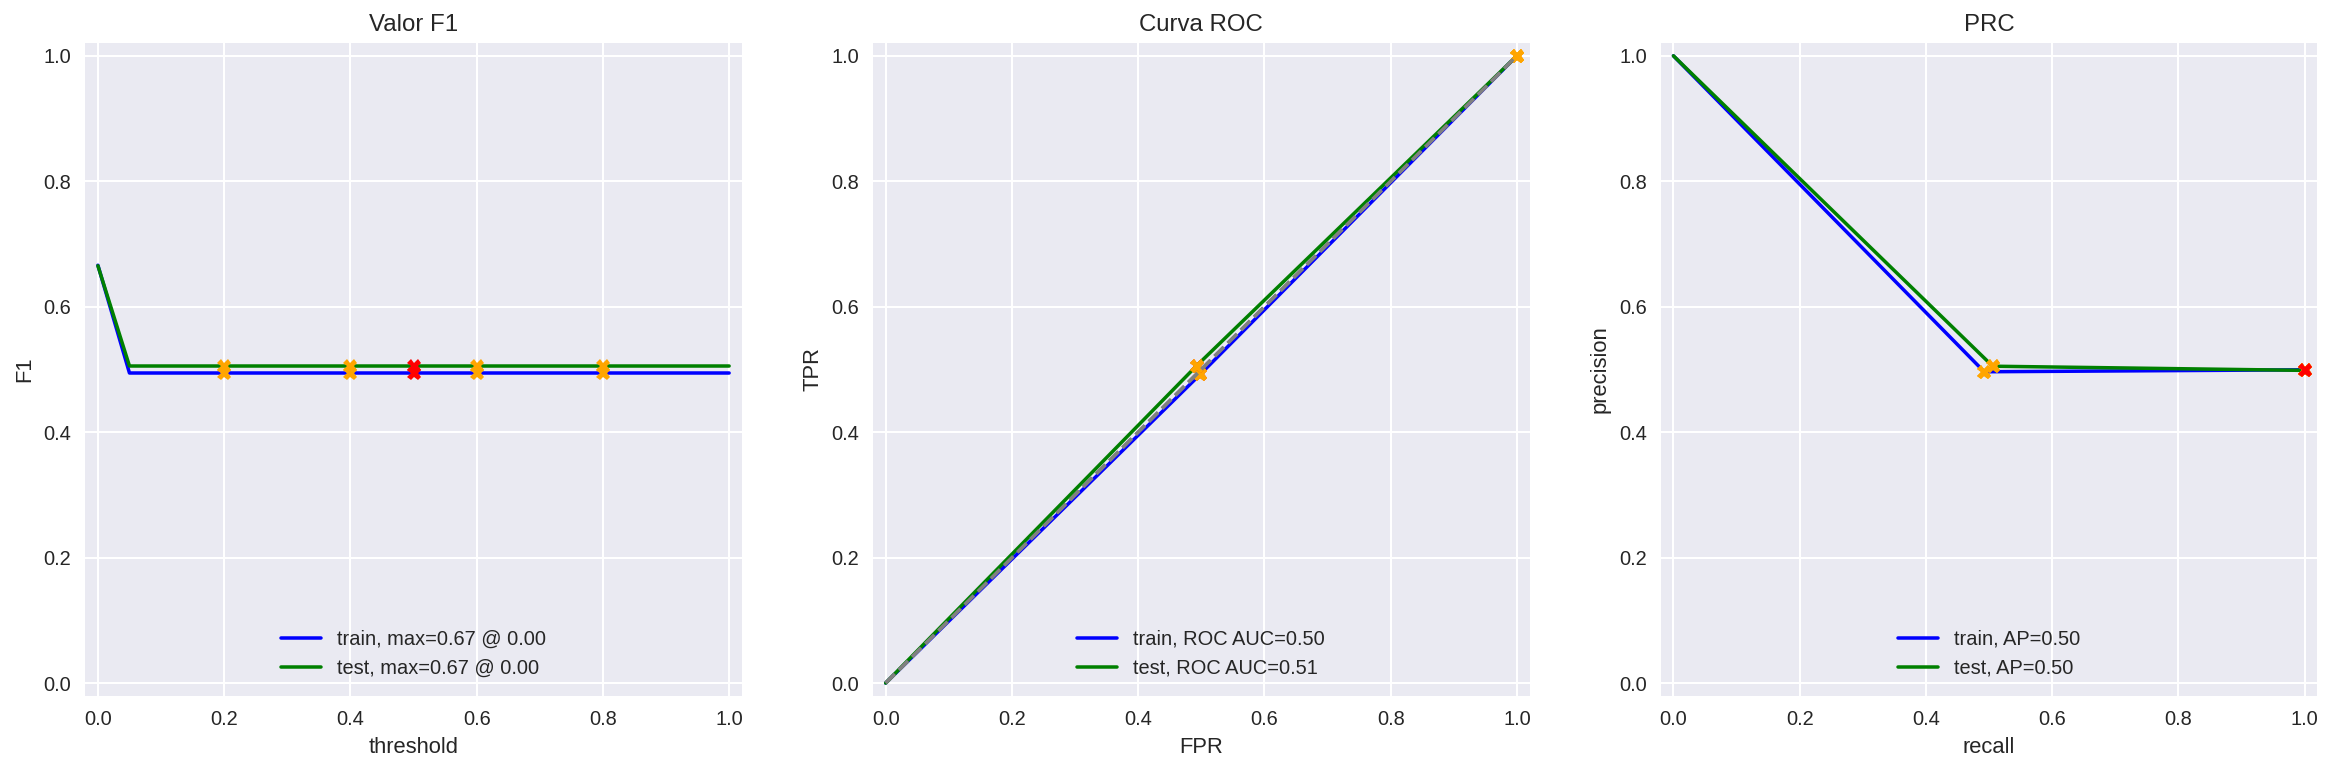

In [58]:
evaluate_model(dummy, df_reviews_train, train_target, df_reviews_test, test_target)

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

As métricas de acurácia e `F1` precisam de um pequeno ajuste. Veja o comentário acima. Esse valor vai estar com `NaN` em todas as etapas de avaliação.

</div>

- The highest value of f1_score was obtained with threshold equal to 0

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Para conhecimento, existem outras variações do DummyClassifier e que podem ser úteis em diferentes aplicações, como, por exemplo `most_frequent`.
<br>

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

</div>

### Modelo 1 - NLTK, TF-IDF e Regressão Linear

In [37]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords

Pre-Processing

In [43]:
df_review_train_lemmatize = df_reviews_train

In [44]:
df_review_train_lemmatize['review'] = df_review_train_lemmatize['review'].apply(lemmatize)

In [45]:
df_review_test_lemmatize = df_reviews_test

In [46]:
df_review_test_lemmatize['review'] = df_review_test_lemmatize['review'].apply(lemmatize)

In [38]:
stop_words = set(stopwords.words('english'))

In [39]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

In [49]:
train_tf_idf = count_tf_idf.fit_transform(df_review_train_lemmatize['review'])

In [50]:
test_tf_idf = count_tf_idf.transform(df_review_test_lemmatize['review'])

In [51]:
model_1 = LogisticRegression()
model_1.fit(train_tf_idf, train_target)
tf_idf_pred = model_1.predict(test_tf_idf)
f1_model_1 = metrics.f1_score(test_target, tf_idf_pred)
print(f1_model_1)

0.880498314774521


                                                      train  \
Accuracy                                           0.937258   
F1        [0.6661434977578475, 0.7107081949555696, 0.752...   
APS                                                0.983272   
ROC AUC                                            0.982734   

                                                       test  
Accuracy                                           0.880986  
F1        [0.6653245243428701, 0.7091117963601185, 0.745...  
APS                                                0.948085  
ROC AUC                                            0.950679  


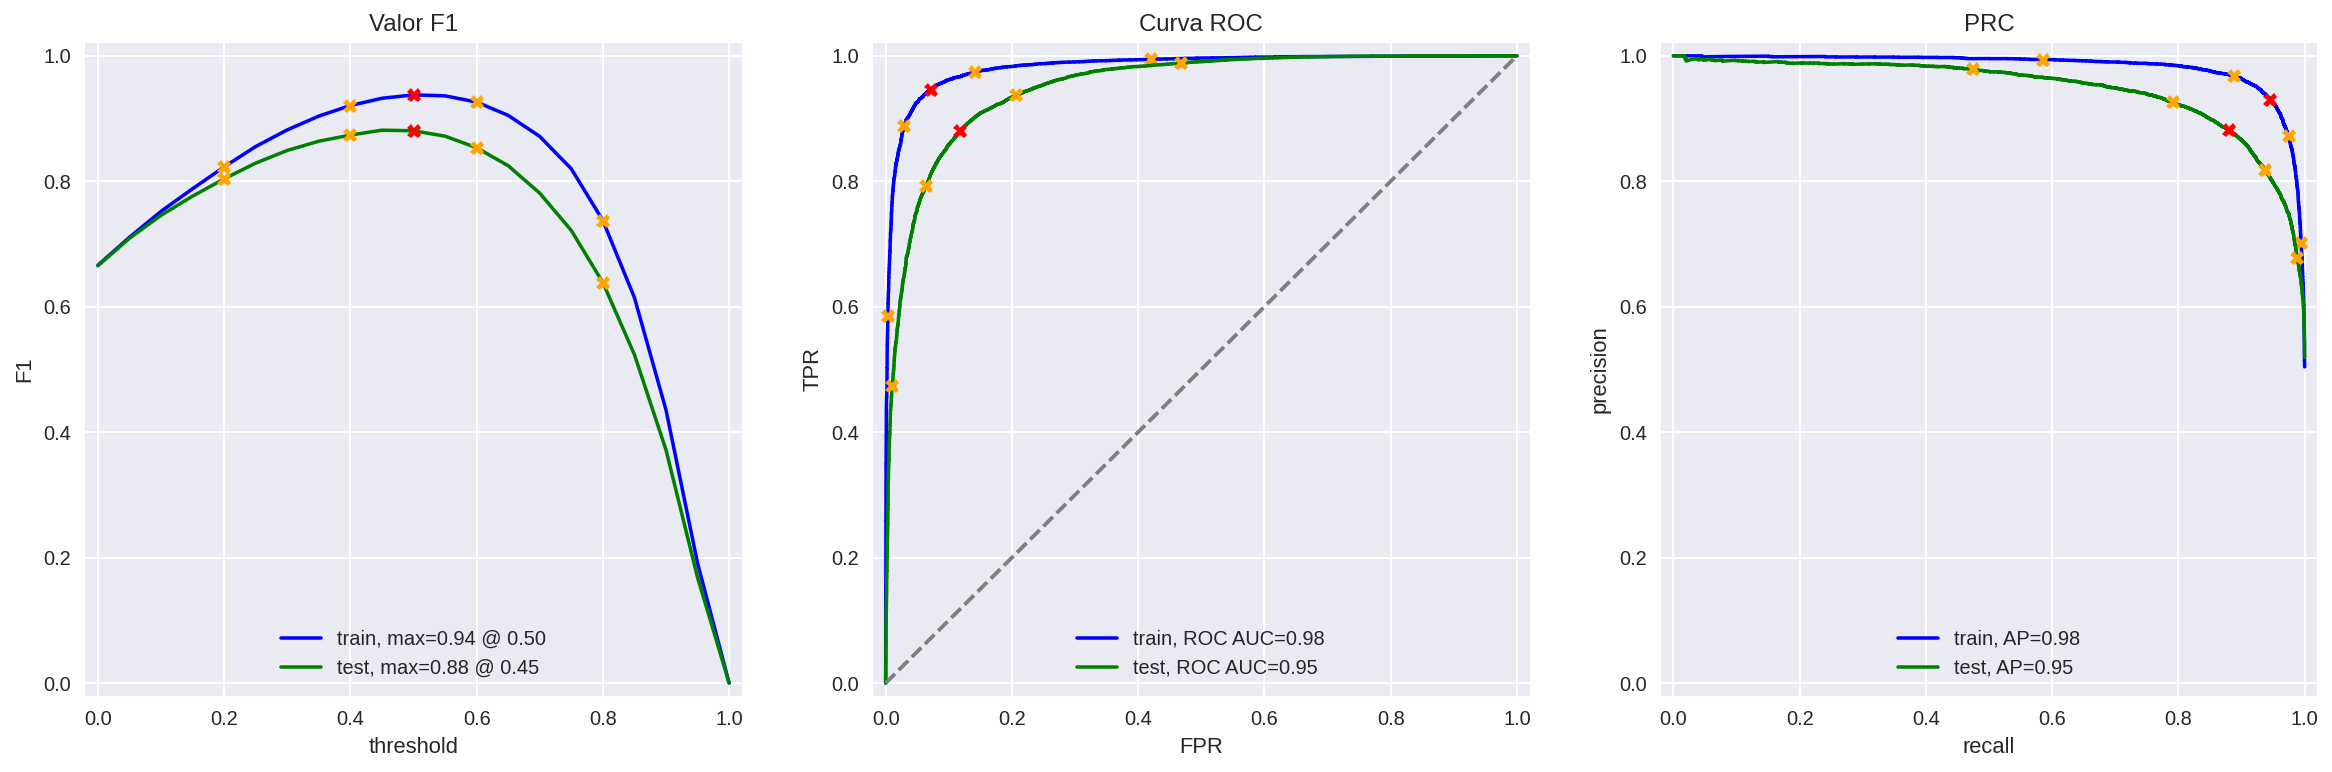

In [52]:
evaluate_model(model_1, train_tf_idf, train_target, test_tf_idf, test_target)

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante usou corretamente o vetorizador `TFIdf` e aplicou o pré-processamento de dados removendo `stopwords`. 
    
Como sugestão, você poderia explorar outras técnicas de pré-processamento de texto com o intuito de reduzir a dimensionalidade do seu conjunto de dados, como `lemmatizing` e `stemming`, além de tirar proveito de stopwords de outras fontes de dados, como do pacote `Spacy`.

<br>
Referências: https://stackoverflow.com/questions/73078231/how-to-get-all-stop-words-from-spacy-and-dont-get-any-errors-typeerror-argume
</div>

<div class="alert alert-block alert-info">
<b>Neste modelo foi utilizado somente lematização com nltk, pois o próximo no proximo  modelo é feito stemming com spacy.</b> <a class="tocSkip"></a>
</div>

- The highest value of f1_score (0.88) was obtained with threshold 0.45

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante avaliou a performance do modelo Regressão Logística.

</div>

### Modelo 3 - spaCy, TF-IDF e Regressão Linear

In [61]:
import spacy
import re

In [64]:
#creating corpus
corpus_train = df_reviews_train[['review', 'pos']].copy()
corpus_test = df_reviews_test[['review', 'pos']].copy()

Pre-processing

In [65]:
corpus_train['review'] = corpus_train['review'].apply(remove_special_characters)

In [66]:
corpus_train['review'] = corpus_train['review'].apply(text_preprocessing_3)

KeyboardInterrupt: 

In [79]:
corpus_test['review'] = corpus_test['review'].apply(remove_special_characters)

/tmp/ipykernel_27/2419187854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_test['review'] = corpus_test['review'].apply(remove_special_characters)


In [80]:
corpus_test['review'] = corpus_test['review'].apply(text_preprocessing_3)

/tmp/ipykernel_27/2023237984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_test['review'] = corpus_test['review'].apply(text_preprocessing_3)


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você pode fazer uma cópia do seu dataframe para evitar o warninga acima ou indexar usando `.loc`, como sugerido pela mensagem.

</div>

<div class="alert alert-block alert-info">
<b>Feito.</b> <a class="tocSkip"></a>
</div>

Create TF-IDF vector

In [81]:
stop_words = set(stopwords.words('english'))


In [82]:
count_tf_idf_2 = TfidfVectorizer(stop_words=stop_words)

In [83]:
corpus_train_tf_idf = count_tf_idf_2.fit_transform(corpus_train['review'])

In [84]:
corpus_test_tf_idf = count_tf_idf_2.transform(corpus_test['review'])

In [85]:
model_2 = LogisticRegression()
model_2.fit(corpus_train_tf_idf, train_target)
tf_idf_pred_2 = model_2.predict(corpus_test_tf_idf)
f1_model_2 = metrics.f1_score(test_target, tf_idf_pred_2)
print(f1_model_1)

0.880498314774521


          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.98  0.95
ROC AUC    0.98  0.95


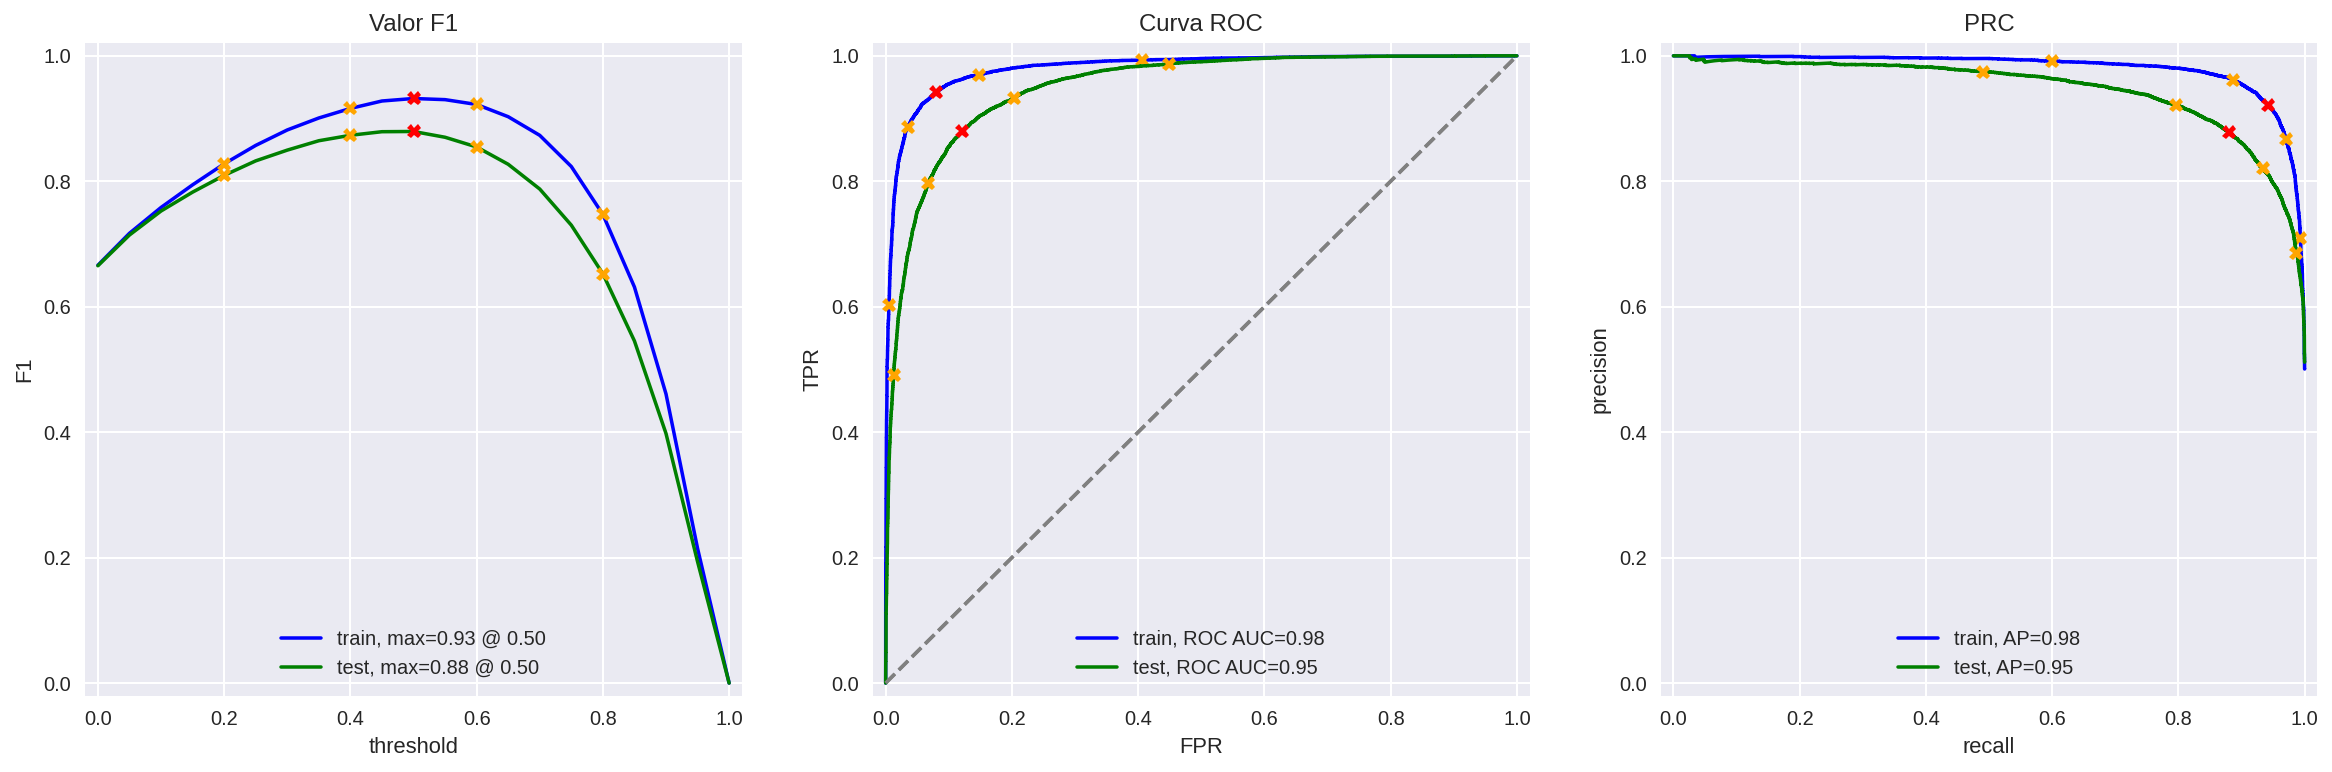

In [86]:
evaluate_model(model_2, corpus_train_tf_idf, train_target, corpus_test_tf_idf, test_target)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Parabéns pelo cuidado de somente aplicar a transformação no conjunto de teste e para não ter vazamento de dados. Essa é uma etapa facilmente neglicenciada.

</div>

### Modelo 4 - SpaCy, TF-IDF e LGBMClassifier

In [87]:
from lightgbm import LGBMClassifier

In [88]:
model_3 = LGBMClassifier()

In [89]:
model_3.fit(corpus_train_tf_idf, train_target)
lgbm_predict = model_3.predict(corpus_test_tf_idf)
f1_model_3 = metrics.f1_score(test_target, lgbm_predict)
print(f1_model_3)

0.8582780337292362


          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.97  0.93
ROC AUC    0.97  0.94


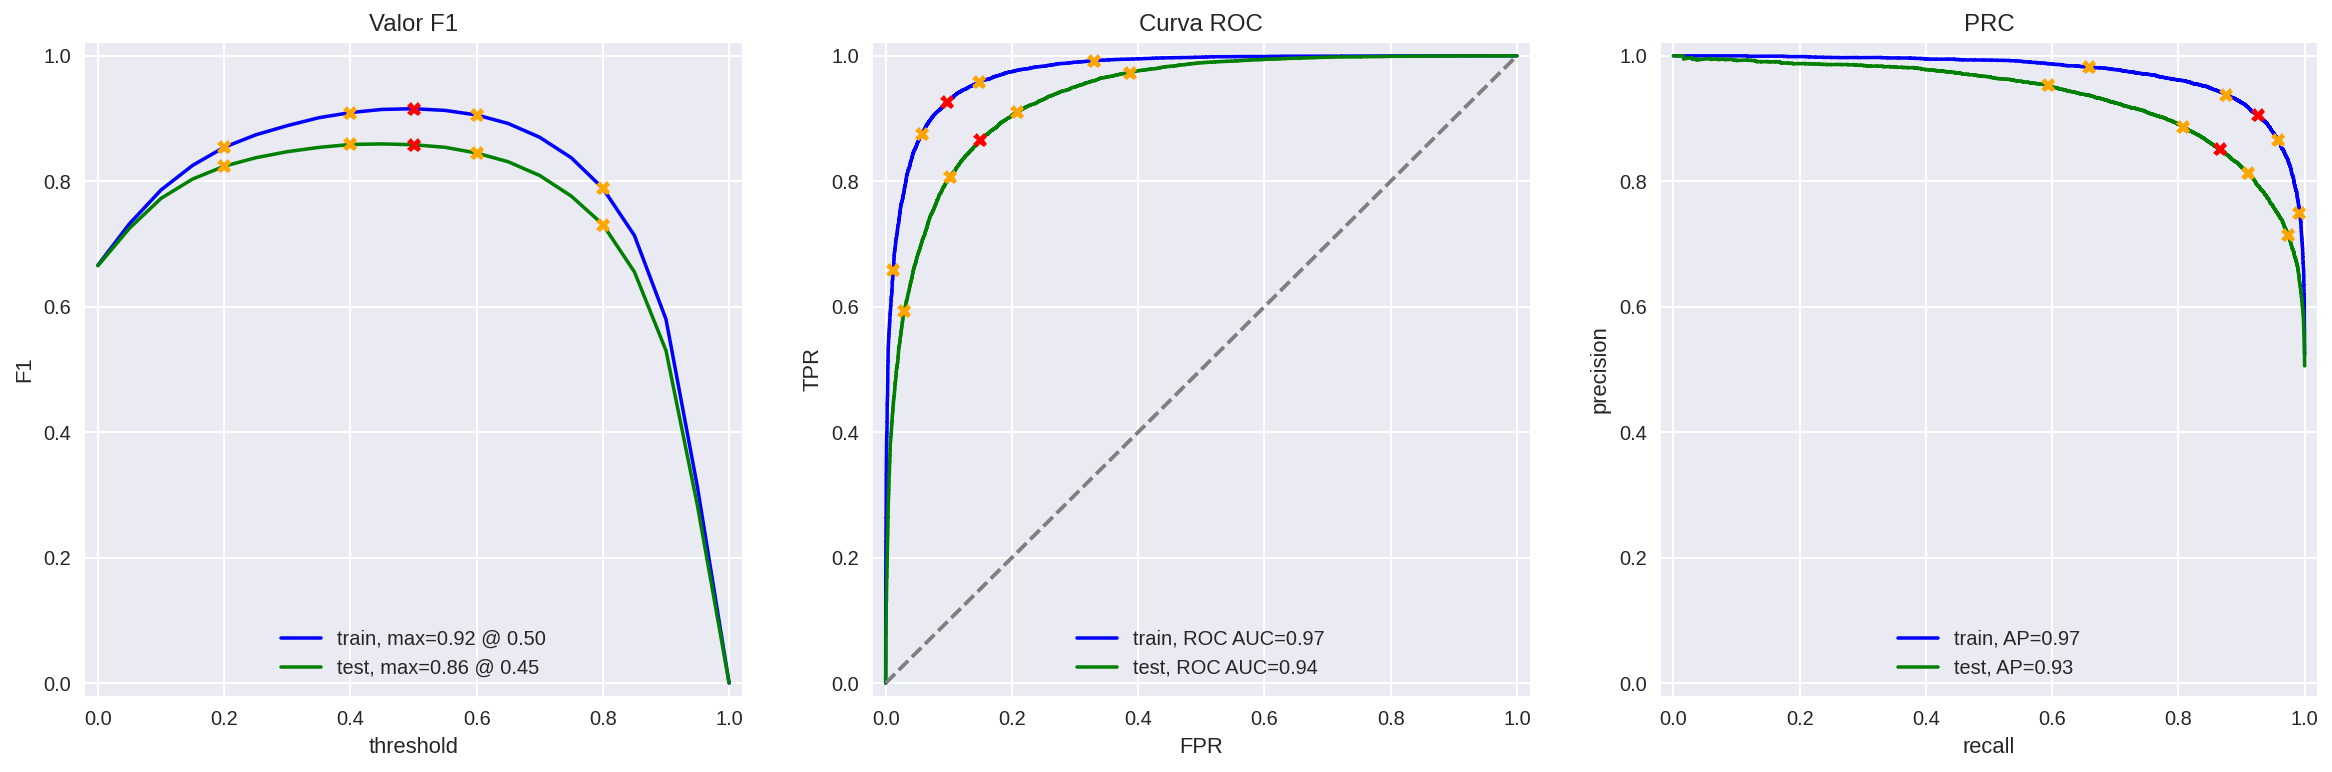

In [101]:
evaluate_model(model_3, corpus_train_tf_idf, train_target, corpus_test_tf_idf, test_target)

###  Modelo 9 - BERT

In [90]:
# import torch
# import transformers

In [91]:
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
# config = transformers.BertConfig.from_pretrained('bert-base-uncased')
# model = transformers.BertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [92]:
# def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
#     ids_list = []
#     attention_mask_list = []

#     # texto para IDs de tokens preenchidos com suas máscaras de atenção
    
#     # <coloque seu código aqui para criar ids_list e attention_mask_list>
    
#     if force_device is not None:
#         device = torch.device(force_device)
#     else:
#         device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
#     model.to(device)
#     if not disable_progress_bar:
#         print(f'Usando o dispositivo {device}.')
    
#     # recebendo incorporações em lotes

#     embeddings = []

#     for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
#         ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
#         # <coloque seu código aqui para criar attention_mask_batch
            
#         with torch.no_grad():            
#             model.eval()
#             batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
#         embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
#     return np.concatenate(embeddings)

In [93]:
# Atenção! A execução do BERT para milhares de textos pode levar muito tempo na CPU, pelo menos várias horas
# train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [94]:
# print(df_reviews_train['review_norm'].shape)
# print(train_features_9.shape)
# print(train_target.shape)

In [95]:
# se você tiver as incorporações, é aconselhável salvá-las para tê-las prontas se 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# e carregar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

### RandomForest

In [96]:
#import library
from sklearn.ensemble import RandomForestClassifier

In [97]:
def nlp_randomforest(features_train, target_train, features_test, target_test, params):
    best_result = 0
    best_params = {}
    for est in range(1, params['n_estimators'], 10):
        for depth in range(1, params['max_depth'], 5):
            model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=42)
            model.fit(features_train, target_train)
            model_predict = model.predict(features_test)
            f1_score = metrics.f1_score(target_test, model_predict)
            if f1_score > best_result:
                best_result = f1_score
                best_params = {'n_estimators': est, 'max_depth': depth}
    return best_result, best_params
    

In [98]:
params = {'n_estimators':50, 'max_depth': 20}
f1_model_4, params_model_4 = nlp_randomforest(corpus_train_tf_idf, train_target, corpus_test_tf_idf, test_target, params)


In [122]:
print(f"f1_score:{f1_model_4} with max_depth:{params_model_4['max_depth']} and n_estimators:{params_model_4['n_estimators']}")


f1_score:0.8093184508709623 with max_depth:16 and n_estimators:41


In [102]:
model_4 = RandomForestClassifier(max_depth=16, n_estimators=41, random_state=42)

In [103]:
model_4.fit(corpus_train_tf_idf, train_target)

RandomForestClassifier(max_depth=16, n_estimators=41, random_state=42)

          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.96  0.88
ROC AUC    0.96  0.89


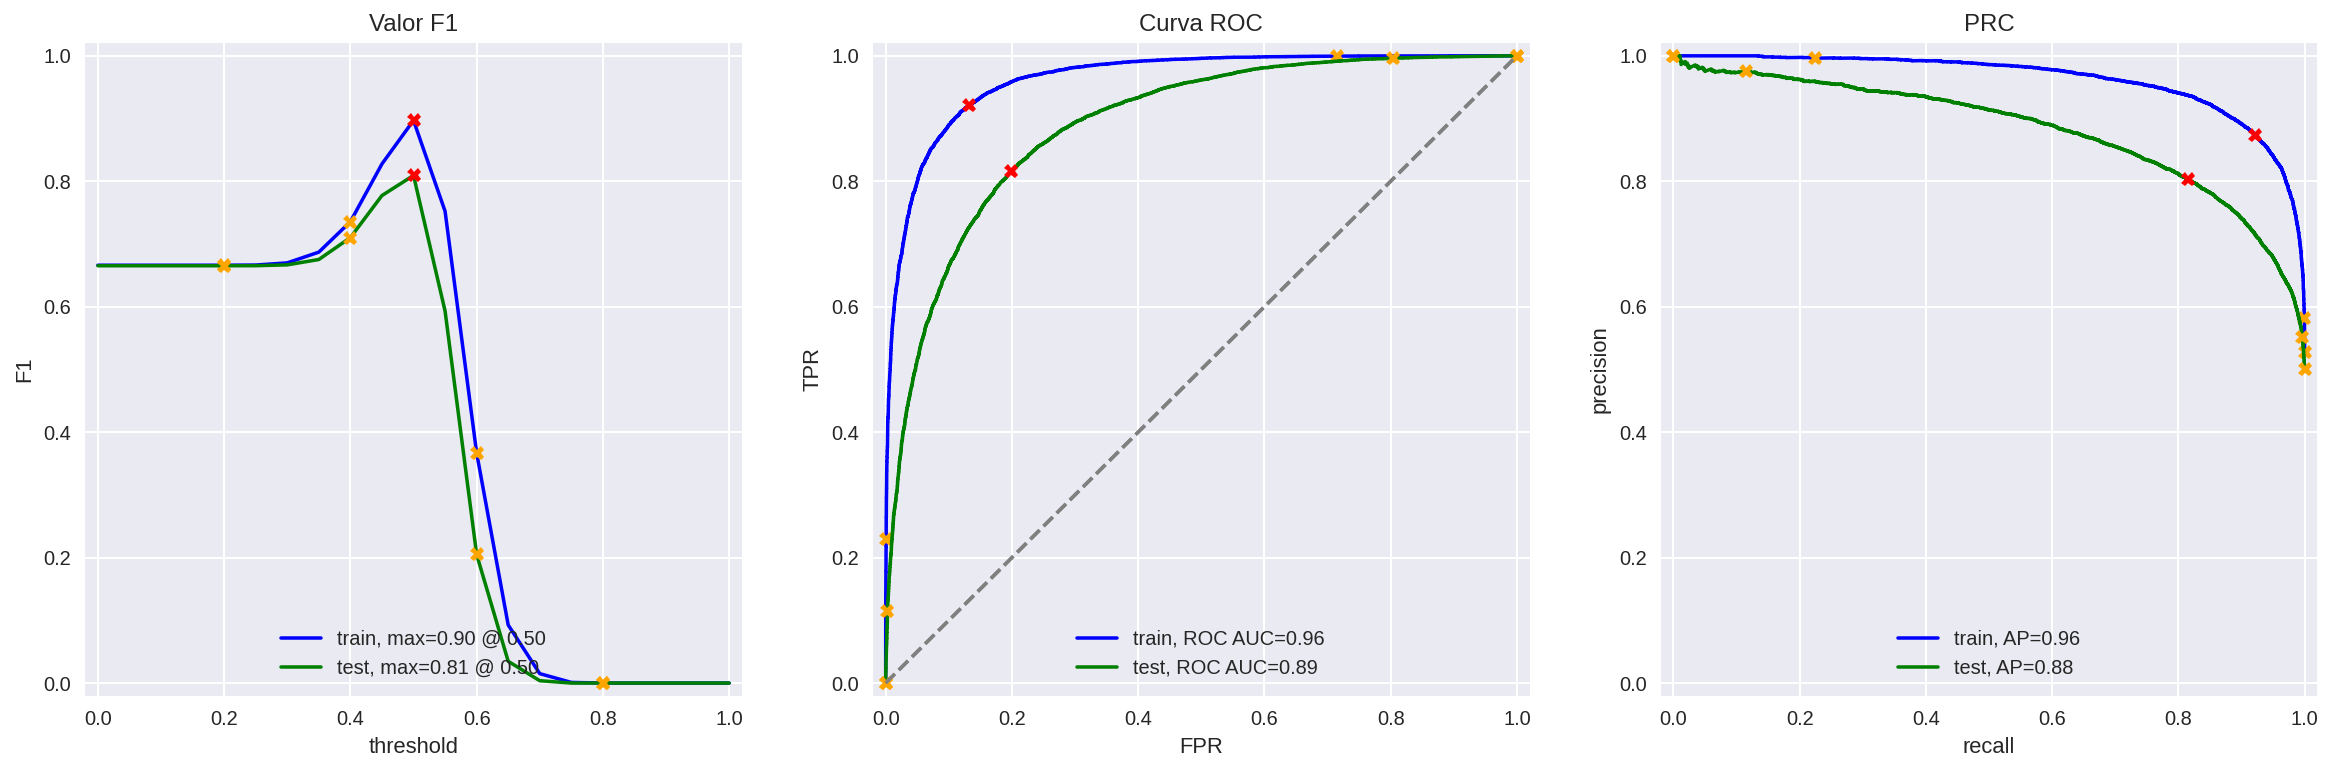

In [104]:
evaluate_model(model_4, corpus_train_tf_idf, train_target, corpus_test_tf_idf, test_target)

### Analysis

- Theres is no difference between f1_score using spacy or nltk libray to lemmatize 
- The best models is `Logistic Regression with` `0.88`

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! O estudante avaliou a performance do modelo 4.

</div>

## Minhas Resenhas

In [123]:
# sinta-se à vontade para remover completamente essas resenhas e experimentar seus modelos nas suas próprias resenhas, as abaixo são apenas exemplos

my_reviews = pd.DataFrame([
    'Eu simplesmente não gostei, não é meu tipo de filme.',
    'Bem, eu fiquei entediado e dormi no meio do filme.',
    'Eu fiquei realmente fascinado com o filme',    
    'Os atores pareciam muito velhos e desinteressados, e mesmo assim foram pagos para participar do filme. Que roubo de dinheiro sem vergonha.',
    'Eu não esperava que a nova versão fosse tão boa! Os escritores realmente se importaram com o material original',
    'O filme tem seus prós e contras, mas eu sinto que em geral é um filme decente. Eu posso me imaginar indo assistir novamente.',
    'Que tentativa podre de comédia. Nem uma única piada cai, todo mundo age de forma irritante e barulhenta, nem crianças não vão gostar disso!',
    'Lançar na Netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir episódio após episódio, deste emocionante e inteligente novo drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(remove_special_characters)
my_reviews['review_norm'] = my_reviews['review_norm'].apply(lemmatize)


my_reviews['review_norm']

0     Eu simplesmente n o gostei n o meu tipo de filme
1     Bem eu fiquei entediado e dormi no meio do filme
2            Eu fiquei realmente fascinado com o filme
3    Os atores pareciam muito velhos e desinteressa...
4    Eu n o esperava que a nova vers o fosse t o bo...
5    O filme tem seus pr s e contra ma eu sinto que...
6    Que tentativa podre de com dia Nem uma nica pi...
7    Lan ar na Netflix foi uma jogada corajosa e eu...
Name: review_norm, dtype: object

### NLTK -TF-IDF Linear Regression

In [135]:
texts = my_reviews['review_norm']

texts_tf_idf = count_tf_idf.transform(texts)

my_reviews_pred_prob = model_1.predict_proba(texts_tf_idf)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.53:  Eu simplesmente n o gostei n o meu tipo de filme
0.49:  Bem eu fiquei entediado e dormi no meio do filme
0.66:  Eu fiquei realmente fascinado com o filme
0.51:  Os atores pareciam muito velhos e desinteressados e mesmo assim foram pagos para participar do filme
0.43:  Eu n o esperava que a nova vers o fosse t o boa Os escritores realmente se importaram com o material
0.51:  O filme tem seus pr s e contra ma eu sinto que em geral um filme decente Eu posso me imaginar indo a
0.62:  Que tentativa podre de com dia Nem uma nica piada cai todo mundo age de forma irritante e barulhenta
0.50:  Lan ar na Netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir epi dio ap s 


### NLP TF - IDF LGBMClassifier

In [137]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_2.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.64:  Eu simplesmente n o gostei n o meu tipo de filme
0.64:  Bem eu fiquei entediado e dormi no meio do filme
0.66:  Eu fiquei realmente fascinado com o filme
0.64:  Os atores pareciam muito velhos e desinteressados e mesmo assim foram pagos para participar do filme
0.49:  Eu n o esperava que a nova vers o fosse t o boa Os escritores realmente se importaram com o material
0.64:  O filme tem seus pr s e contra ma eu sinto que em geral um filme decente Eu posso me imaginar indo a
0.69:  Que tentativa podre de com dia Nem uma nica piada cai todo mundo age de forma irritante e barulhenta
0.64:  Lan ar na Netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir epi dio ap s 


### Random Forest

In [138]:
texts = my_reviews['review_norm']


my_reviews_pred_prob = model_4.predict_proba(count_tf_idf_2.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.53:  Eu simplesmente n o gostei n o meu tipo de filme
0.53:  Bem eu fiquei entediado e dormi no meio do filme
0.53:  Eu fiquei realmente fascinado com o filme
0.53:  Os atores pareciam muito velhos e desinteressados e mesmo assim foram pagos para participar do filme
0.53:  Eu n o esperava que a nova vers o fosse t o boa Os escritores realmente se importaram com o material
0.53:  O filme tem seus pr s e contra ma eu sinto que em geral um filme decente Eu posso me imaginar indo a
0.55:  Que tentativa podre de com dia Nem uma nica piada cai todo mundo age de forma irritante e barulhenta
0.54:  Lan ar na Netflix foi uma jogada corajosa e eu realmente aprecio ser capaz de assistir epi dio ap s 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito! Você percebe como os modelos geram saídas ligeiramente diferentes para os mesmos exemplos de texto e mesmo sendo treinados no mesmo conjunto de dados? Por ser um processo não-determinístico, é muito comum que isso aconteça em projetos reais, a depender do modelo utilizado. Além disso, alguns modelos vão se sair melhor em alguns problemas enquanto outros vão ter desempenho superior em outros. Esse dilema é conhecido como o teorema do "almoço grátis" (no free lunch theorem) e é por isso que geralmente fazemos experimentos com vários modelos e configurações com o intuito de encontrar a melhor combinação.
    
    
<br> 
    
Referência: https://analyticsindiamag.com/what-are-the-no-free-lunch-theorems-in-data-science/

</div>

### Modelo 9

In [ ]:
# texts = my_reviews['review_norm']

# my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

# for i, review in enumerate(texts.str.slice(0, 100)):
#     print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusões

- The best probability for my reviews validatio was LGBMCLassifier with 64% 
- This tests were made with models trainned in english, so to obtain better result we should train in portuguese

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui vamos rever os resultados após os ajustes no cálculo das métricas. Para avançarmos, é preciso que pelo menos 1 modelo alcance o `f1-score` de pelo menos 0.85. Peço que revise essa seção após as alterações.

</div>

<div class="alert alert-block alert-info">
<b>O modelo de regressão linear, para predição no conjunto de teste do dataframe de teste obteve 0.88 de f1_score.</b> <a class="tocSkip"></a>
</div>

# Checklist

- [x]  O caderno foi aberto
- [x]  Os dados de texto são carregados e pré-processados para vetorização
- [x]  Os dados de texto são transformados em vetores
- [x]  Os modelos são treinados e testados
- [x]  O limiar da métrica foi atingido
- [x]  Todas as células de código estão organizadas na ordem de sua execução
- [x]  Todas as células de código podem ser executadas sem erros
- [x]  Há conclusões 